In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

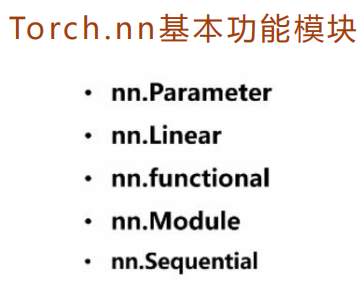

### nn.Parameter

在PyTorch中，nn.Parameter是一种特殊的Tensor，用于表示模型的可学习参数。当它被用作nn.Module的属性时，会自动被注册为模型的参数。这意味着它会被视为模型中需要通过训练学习的参数。通过将Tensor包装成nn.Parameter，你告诉PyTorch这个Tensor应该被视为模型的一个参数，这样它就能在训练过程中被更新（例如，在反向传播中）并包含在通过model.parameters()返回的模型参数列表中。

In [4]:
class Mymodel(nn.Module):#继承自nn.Module
    def __init__(self):
        super(Mymodel, self).__init__()#super()函数的调用主要用于在子类中调用父类的方法。
        #它常用于构造函数__init__中，以确保子类创建时能够正确地初始化父类部分。
        #这在使用类继承时特别重要，因为它允许子类扩展或修改父类的行为。
        #通过super()，可以确保父类的构造方法被执行，这样子类实例就会继承父类的所有属性和方法，同时还可以添加或重写自己的属性和方法。
        #super()：这是调用超类（即父类或基类）方法的函数。
        #MyModel：当前类的名称。
        #self：代表类的实例本身。
        #.__init__()：调用超类的初始化方法。
        self.weight = nn.Parameter(torch.randn(10))
        #torch.randn(10): 调用了PyTorch的randn函数生成一个长度为10的随机数向量，其元素从标准正态分布（均值为0，方差为1）中采样。

In [5]:
torch.randn(10)

tensor([ 1.5863, -1.0707, -0.7992, -0.0179, -0.8091, -0.9157, -0.9833, -0.7747,
        -1.5916, -0.3979])

In [6]:
model = Mymodel()

In [7]:
model.weight

Parameter containing:
tensor([-0.4467,  0.7665, -0.4707, -0.4412, -0.6230, -0.5118, -1.8622, -1.5836,
        -0.4227, -2.5577], requires_grad=True)

In [8]:
#requires_grad=True设置在Tensor对象上。
#当设置为True时，它指示PyTorch需要对这个Tensor进行梯度计算。
#这意味着在优化过程中，PyTorch会自动计算并存储这个Tensor的梯度，以便用于后续的梯度下降优化步骤。
#这通常用于模型的可训练参数，即需要在训练过程中通过反向传播更新的参数。

### nn.Linear

在PyTorch中，nn.Linear是一个实现线性变换的模块，其操作可以表示为y = xA^T + b。它通常被称为全连接层或密集层，是神经网络中的基础组件。该模块使用学习到的权重和偏置将输入特征转换成输出特征。

In [9]:
#nn.Linear的参数包括：
#in_features：每个输入样本的大小。
#out_features：每个输出样本的大小。
#bias：如果设置为False，层将不会添加偏置。默认值为True。

In [10]:
#在nn.Linear层中，偏置是一个与输出特征数相同长度的向量。
#在执行线性变换y = xA^T + b时，矩阵A与输入x相乘后，会将这个偏置向量b加到结果上。
#这一步通常在内部自动完成，你不需要手动添加偏置向量，因为它是nn.Linear的一部分，并且在训练过程中与权重一起自动更新。
#偏置允许你的模型在输入为零向量时有非零输出，这可以提高模型的灵活性。

In [11]:
import torch
import torch.nn as nn

In [13]:
linear_layer_without_bias = nn.Linear(in_features=3, out_features=2, bias=False)
linear_layer_with_bias = nn.Linear(in_features=3, out_features=2, bias=True)

In [14]:
input_vector = torch.randn(3)

In [16]:
output_vector_with_bias = linear_layer_with_bias(input_vector)
output_vector_with_bias

tensor([-0.3653, -0.4291], grad_fn=<AddBackward0>)

In [17]:
output_vector_without_bias = linear_layer_without_bias(input_vector)
output_vector_without_bias

tensor([-1.2325, -0.9496], grad_fn=<SqueezeBackward3>)